In [1]:
# loading libraries, some settings for plots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 8]
sns.__version__ #should be >= 0.11

'0.11.2'

There are a lot of different ways to explore a dataset. Sometimes you know a lot about it, at other times almost nothing. We will explore the 'Iris' dataset, which is a dataset of 150 flowers. The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 

## Peek at the data

It is shipped with the seaborn package, so we can load it from there. First, let's try the `.describe()`, `.info()` and `.head()` functions to get some idea.

In [2]:
df = sns.load_dataset("iris")
# What does the data look like?
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


`.info()` is often usefull to check if you loaded all the data in the expected way. Sometimes numbers end up as strings, etc.

Here, everything seems to be as expected.

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Visual exploration
It is hard to say what the best way is to approach your dataset. This depends on a lot of things: 

- Do you already have some sort of hypothesis?
- How many datapoints do you have? Sometimes it is smart to add something like transparancy (usually named "alpha" with a value between 1 and 0) if you have overlapping points
- 80% of the time, you can get really far with scatterplots, lineplots and boxplots.

Depending on your dataset, you might want to explore the data in different ways. Exploring the data comes down to a three step process:

1. Ask yourself a question about the data. E.g., is there a relation between variable $x_1$ and $x_2$? How is the distibution of variable $x_3$? What are outliers? 
2. Try to answer this question roughly by visualising the data or looking at statistics.
3. Return to 1, unless there are no questions left.

In the case of the Iris dataset, the data is not that complex. But you will have to get creative in most cases. More often than not, the data is too complex (with too many features) or too polluted to have something clear and cut the first plot.

The [example gallery](https://seaborn.pydata.org/examples/index.html) at the seaborn website gives a nice overview of what is possible.

## Scatterplots



Let's start with a matplotlib scatterplot. With this plot we could answer a question like: are longer leaves also wider?

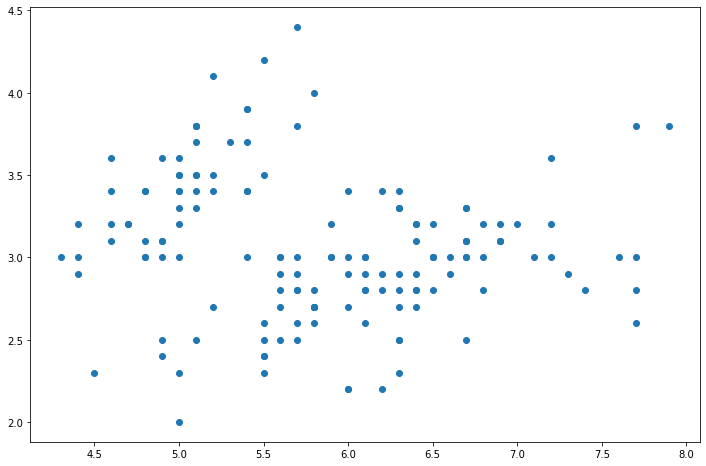

In [5]:
plt.scatter(data=df, x ='sepal_length', y='sepal_width')

This doesnt show a clear relationship. Maybe if we specify by species? Adding color with matplotlib can be done, but is usually much more userfriendly with seaborn. We can use sns.scatterplot for this.

If you want to find out more about a function (e.g., "how to add color" or "what are additional parameters you can pass on to sns.scatterplot?"), you can always use the `?` or `help()` function. Uncomment the line below if you want to try it out.

In [6]:
#?sns.scatterplot

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

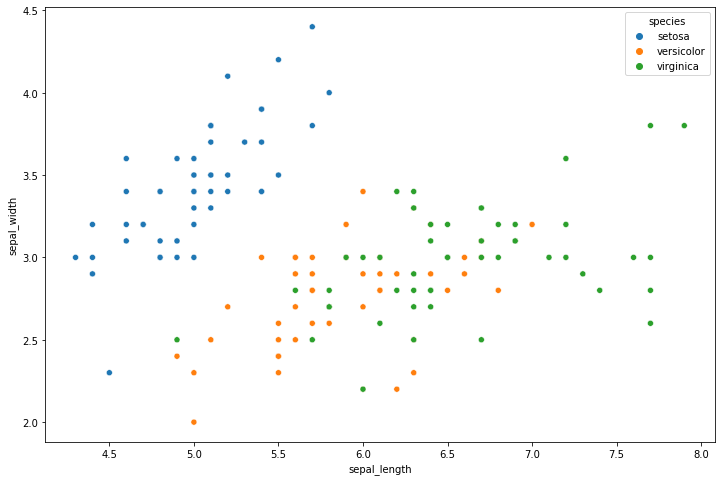

In [7]:
sns.scatterplot(data=df, x ='sepal_length', y='sepal_width', hue='species')

At the seaborn [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html) we can look up the color palettes. Ask yourself if you need categorical colors, sequential colors or a diverging palette (e.g for heatmaps).

In the example below, I modify:
- the order of the labels
- the palette

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

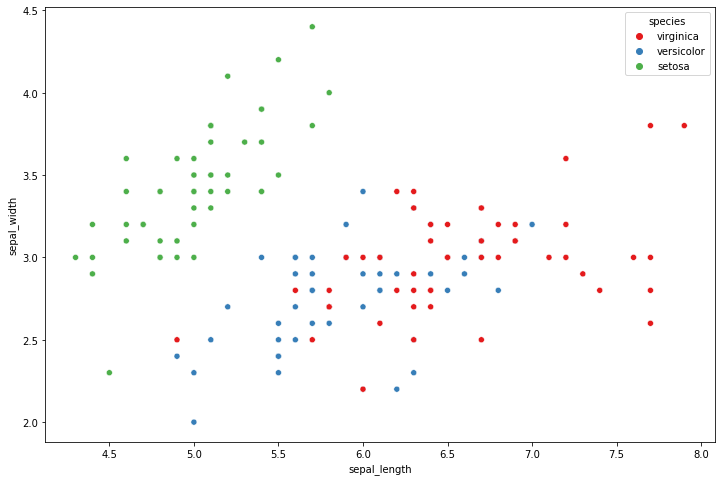

In [8]:
speciesorder = ['virginica', 'versicolor', 'setosa']
sns.scatterplot(data=df, x ='sepal_length', y='sepal_width', 
    hue='species', palette='Set1', hue_order=speciesorder)

Okay, so the leaves seem to get wider for setosa, but much less for virginica.

## lmplot: Adding lines to confirm a hypothesis

We can try to confirm this idea with a lmplot or regplot.
regplot is a bit more basic. It hasn't implemented the `hue` argument, which is inconvenient. We can pass it a `color` parameter, but we have to craft a low-level matplotlib color scheme.

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

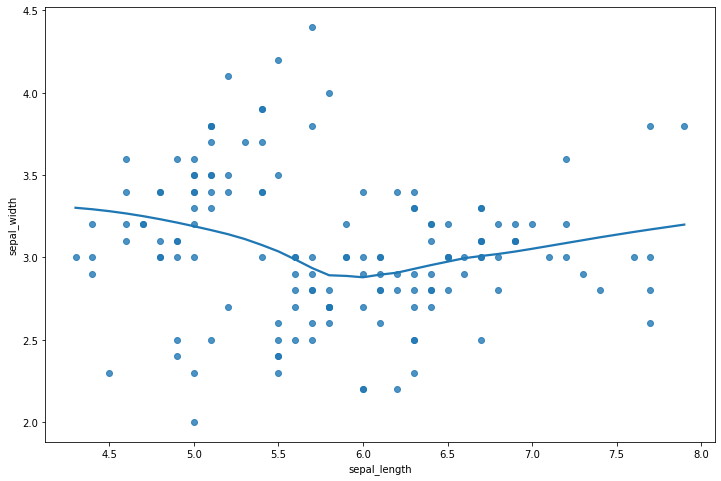

In [9]:
sns.regplot(data=df, x = 'sepal_length', y = 'sepal_width', lowess=True)

We can switch to lmplot if we want to use the more convenient `hue`. I will also add some `alpha`.

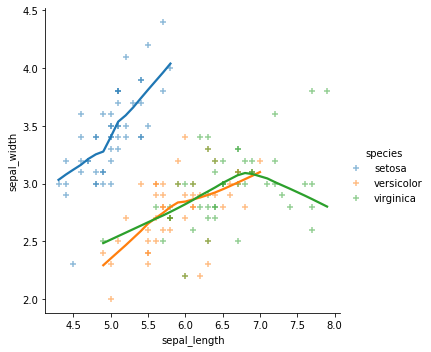

In [10]:
sns.lmplot(data=df, x = 'sepal_length', y = 'sepal_width', hue='species',
    lowess=True, markers='+', scatter_kws={'alpha':0.5})

An `lmplot` is nice, but you should know that it works a bit different then the other plots. It is actually a combination of a facetgrid and regplot. More about that later.

for now, not that we:
- added a `lowess=True` variable. This stands for `locally weighted scatterplot smoothing`. If you want to see the impact, turn it to `False`.
- we changed the markershape with `markers='+'`.
- because it might be the case that markers are overlapping, we can add `alpha`. `lmplot` has an option `scatter_kws`. This is a dictionary that will be passed on to the scatterplot. So everything you need to pass to the scatterplot, you can add here. 

Indeed, there seems to be some overlap. Lets make the dots hollow by removing the face, so we only keep the edge.

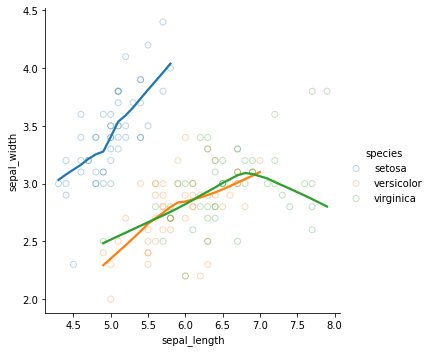

In [11]:
sns.lmplot(data=df, x = 'sepal_length', y = 'sepal_width', hue='species',
    lowess=True, scatter_kws={'facecolors':'none', 'alpha':0.3})

## Modifying the data
### Changing the order for categorical data

A few plots back, I changed the order of the labels. For this dataset, that was kind of random, just to illustrate that you can do it.
But sometimes, you might have a very good reason to diverge from alphabetical ordering of the labels. Mainly if the labels have some intrinsic kind of order, eg days of the weeks, or bad-neutral-good, etc.

In that case, it is usually a good idea to modify the type of the Series to 'categorical' and specify an order. The plots will pick up this order automatically from here on.

In [18]:
df.species = df.species.astype('category')
df.species = df.species.cat.set_categories(speciesorder)
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

### Changing the shape of the data with melt()
Sometimes, the format of you data isn't usefull for the type of plot you want to make. Say, we want to make boxplots for every type of measurement, and specify the color of the species. If we want that, melting the dataframe into a long format often makes things much easier to plot.

In [19]:
p = df.melt(id_vars = 'species')
p

,species,variable,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


## Boxplots
Let's compare the distribution of the variables for all features between species. 
With a plot like this, you could ask a question like "Should it be easy for a model to split the species"? 

Looking at the plot, what do you think will make this easy or hard? What do you learn from the data, if you look at the graphs below? Can you guess which variables are the most usefull for separating the classes?

<AxesSubplot:xlabel='variable', ylabel='value'>

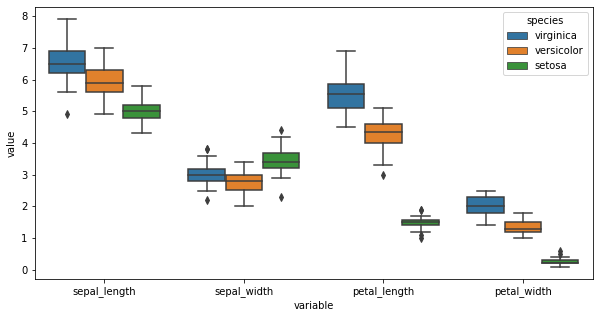

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data = p, x = 'variable', y='value', hue='species')

## Facetgrids
A slightly different approach to sort of the same result would be to use facetgrid. Note that it completely depends on your data, if you need to melt your dataframe!

**note**: sometimes, you already have a column with categories. Sometimes you need to create that with `.melt()` or `.pivot_table()`.

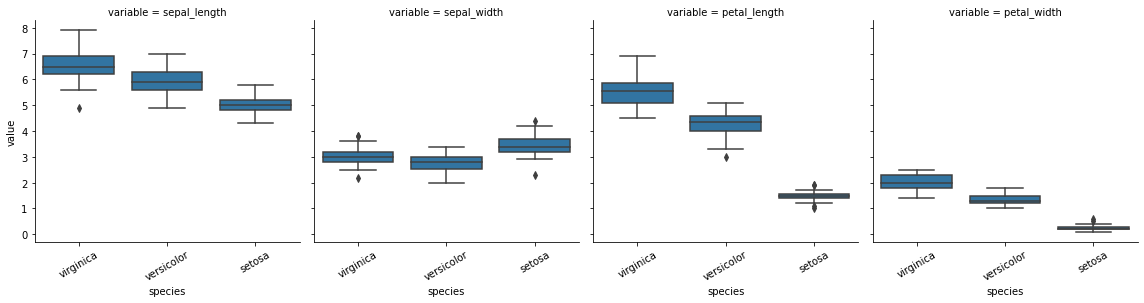

In [21]:
g = sns.FacetGrid(p, col='variable', height=4)
g.map(sns.boxplot, 'species', 'value', order=speciesorder)
g.set_xticklabels(rotation=30)

We specify a column variable in the Facetgrid, and map a certain type of plot to these facets. We rotate the ticklabels to keep them readable.

While the facetgrid does not seem to add very much for the iris dataset, if you want more complex facets it is very easy to simply add a row.

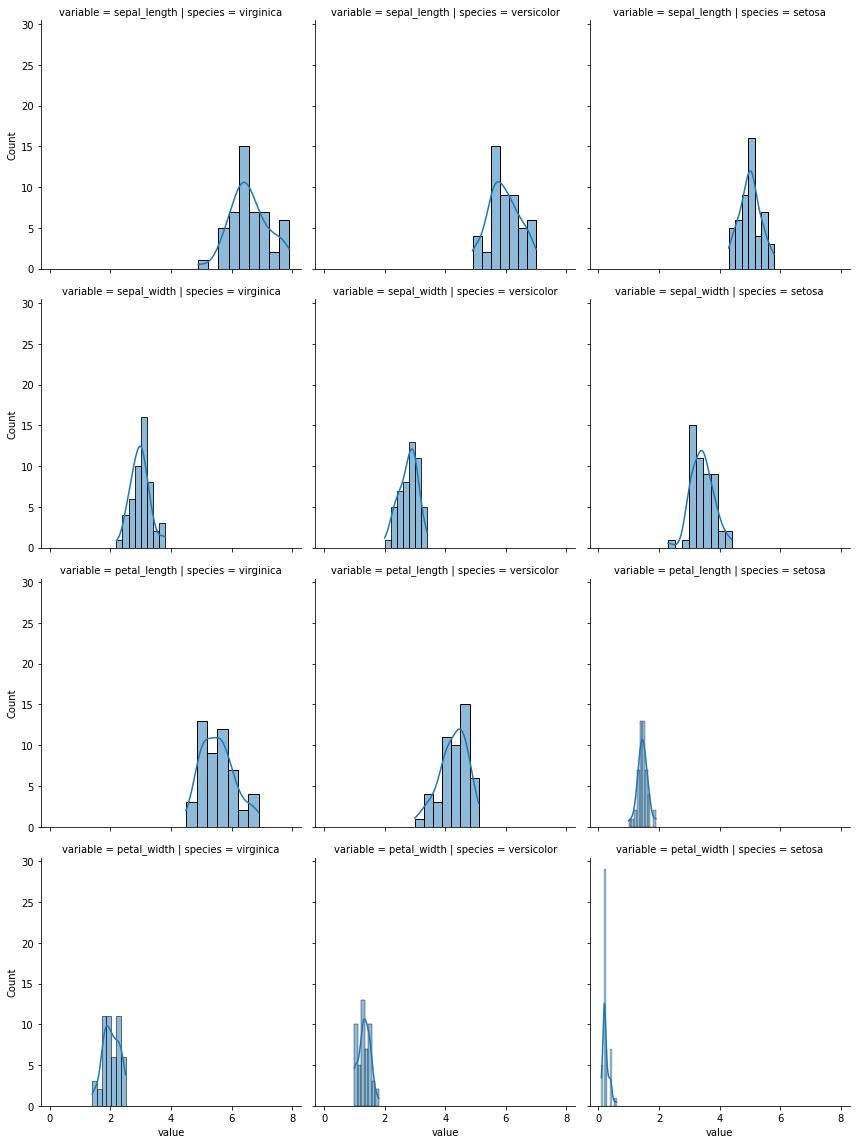

In [22]:
g = sns.FacetGrid(p, col='species', row='variable', height=4)
g.map(sns.histplot, 'value', kde=True)

You might argue that this dataset is too simple to use a facetgrid, to which I would agree. But there are datasets where you have much more variables, where this is really useful.

The variable specification in `FacetGrid.map()` requires a positional argument mapping, but if the function has a data parameter and accepts named variable assignments, you can also use `FacetGrid.map_dataframe()`.
This is useful if we want to specify `hue`, for example. Let's test that with a histplot with a kde.

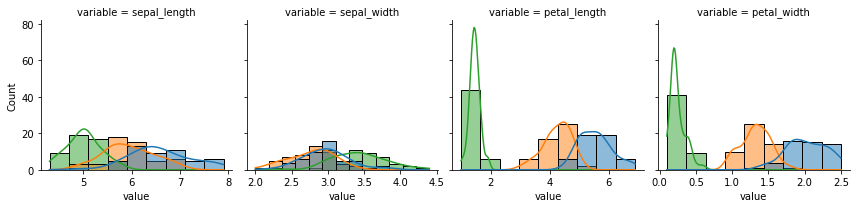

In [23]:
g = sns.FacetGrid(p, col='variable', sharex=False)
g.map_dataframe(sns.histplot, x='value', hue='species', kde=True)



## Low level approaches
There are many approaches that have the same (or sort of the same) result.
You could completely create the facetgrid above with a more low-level approach through matplotlib.
The downside of this, is that it takes much more code. The upside could be, that because you have to define everything by hand, it is easier to do some weird things.
For example, let's say you wanted the middle subplot to have some additional data preparation. Or maybe another type of plot. That sort of out-of-the-box things would be much harder to do with seaborns Facetgrid, and at that point matplotlib might be easier.

However, because seaborn is just a high level wrapper around a matplotlib backend, you can also merge the two approaches pretty easy.

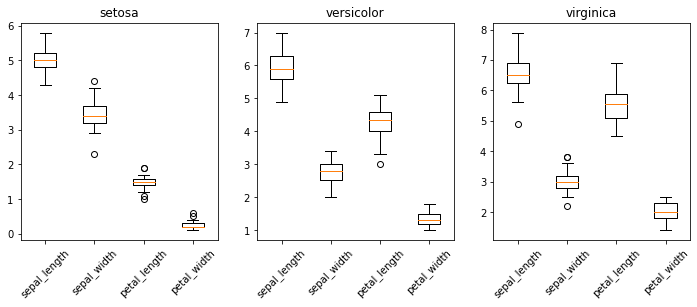

In [24]:
# an example to do the same with matplotlib
variables = df.columns[:-1].values # get the variables
labels = np.unique(df['species']) # get the unique labels

fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs = axs.ravel() 
# ravel flattens the 2D grid into a list, in the case where you would add multiple rows (eg subplots(2,2))
# after ravel, you only need one index [i] instead of a 2d index [i,j]
for i, label in enumerate(labels): # enumerate numbers the list
    # withouth the ravel, we would have needed axs[i,j] if you have a subplot with more than one row.
    # for every label, we only take the variables and transpose the columns
    axs[i].boxplot(df[df['species'] == label][variables]) 

    # some esthetics
    axs[i].set_xticklabels(variables, rotation=45)
    axs[i].set_title(label)


## Adding new features
We saw before that, for setosa, if the leaves got longer, the got much faster wide as compared to the other two. We might explore this in different ways. Let's try to add some new features. One way could be to explore the surface of the leaves. Let's add a new feature for that.

We approximate the shapes as a square to keep things easy.

<AxesSubplot:xlabel='sepal_surface', ylabel='Count'>

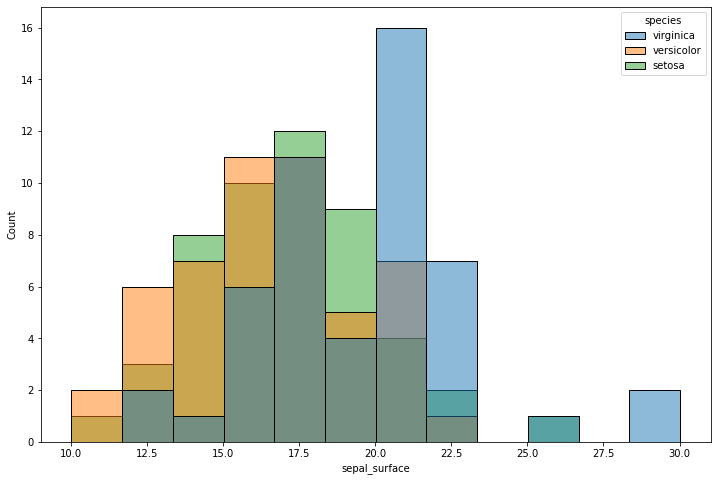

In [25]:
df['sepal_surface'] = df.apply(lambda x: x.sepal_length * x.sepal_width, axis=1)
sns.histplot(data=df, x='sepal_surface', hue='species')

Ah,  virginica typically has the largest leaves (ignoring our approximation of the shape).

So, maybe what we were after was something else. Our question is : for every unit of lenght we add to a leave, how many units of width are being added? Let's divide the two values like this:

<AxesSubplot:xlabel='sepal_frac', ylabel='Count'>

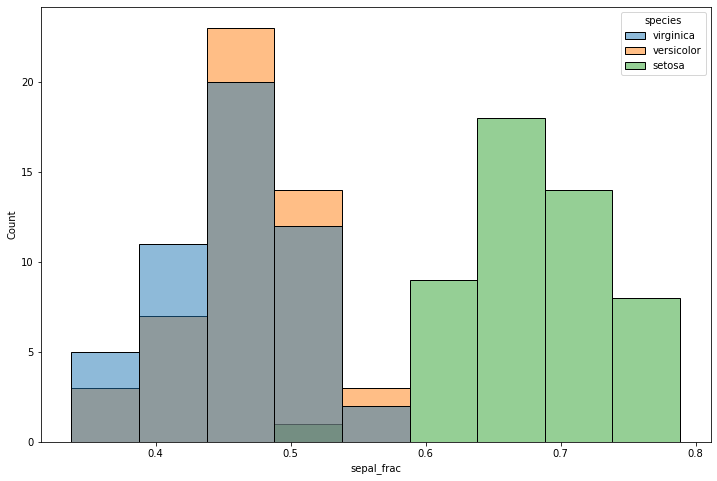

In [26]:
df['sepal_frac'] = df.apply(lambda x: x.sepal_width / x.sepal_length, axis=1)
sns.histplot(data=df, x='sepal_frac', hue='species')

This confirms our idea. Setosa leaves get wider approximate with a factor 0.7, the others with a factor 0.5.

### using `pd.cut()` for bins
Now, let's assume we would want to use one of these new units as groups. Simply adding them to the axis will not go well, because the values are continuous. But we can bin them, with `pd.bin`. We can specify the amount of bins we want. Let's go with 3 bins:

<AxesSubplot:xlabel='species', ylabel='sepal_frac'>

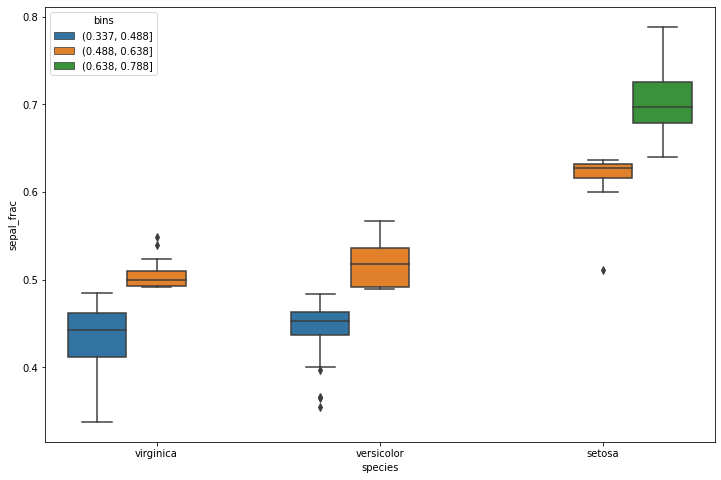

In [27]:
df['bins'] = pd.cut(df['sepal_frac'], 3)
sns.boxplot(data=df, x='species', y='sepal_frac', hue='bins')

## heatmaps
Another useful visualization is the heatmap. The make this, we need to shape the data in such a way that is has the columns and rows for the variables, and the values are what we want to use for the heatmap.

Using `.pivot_table` we need to specify:
- the new rows with `index`
- the new columns
- the new values
- an aggregation function. Default is `mean` but lets use `count` (because the bins already tell us about the expected value)

In [28]:
hm = df[['species', 'sepal_frac', 'bins']].pivot_table(index='species', values='sepal_frac', columns='bins', aggfunc='count')
hm.head()

bins,"(0.337, 0.488]","(0.488, 0.638]","(0.638, 0.788]"
species,,,
virginica,36,14,0
versicolor,33,17,0
setosa,0,10,40


<AxesSubplot:xlabel='bins', ylabel='species'>

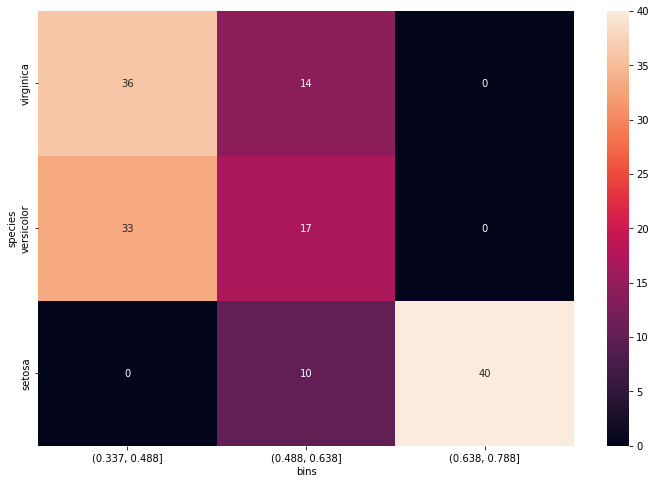

In [29]:
sns.heatmap(hm, annot=hm, cmap='rocket')

## pairplot
A last type of plot that can be useful, is the pairplot. You can completely modify what is on the upper and lower half, and on the diagonal. For a few combinations of features, it can be a fast way to peek at correlations.
But be carefull before you use this function, as it scales $O(n^2)$: if you have 100 features, your pairplot will attempt to create $100^2$ plots which wont work.

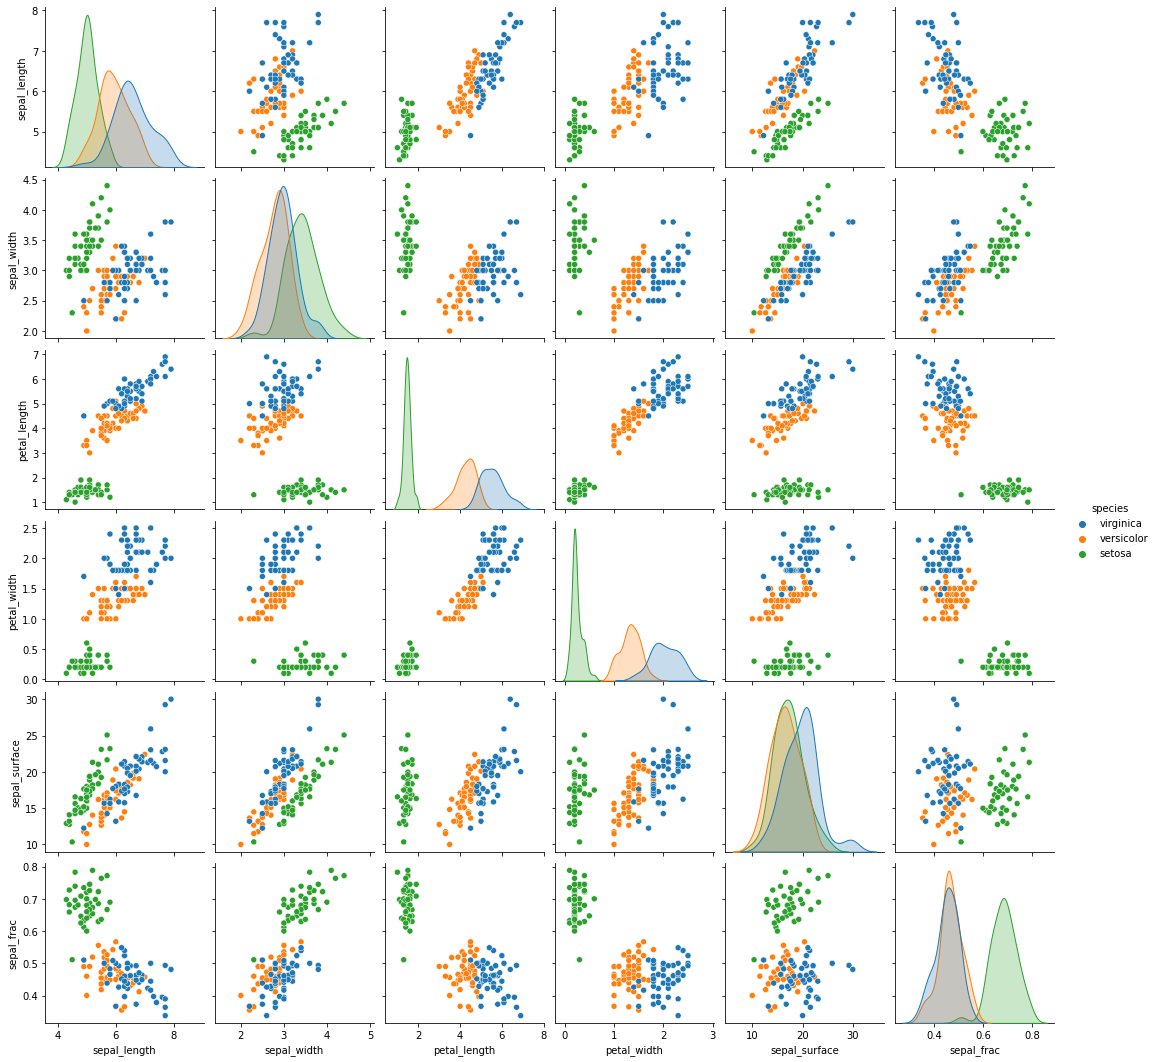

In [30]:
sns.pairplot(df, hue='species')

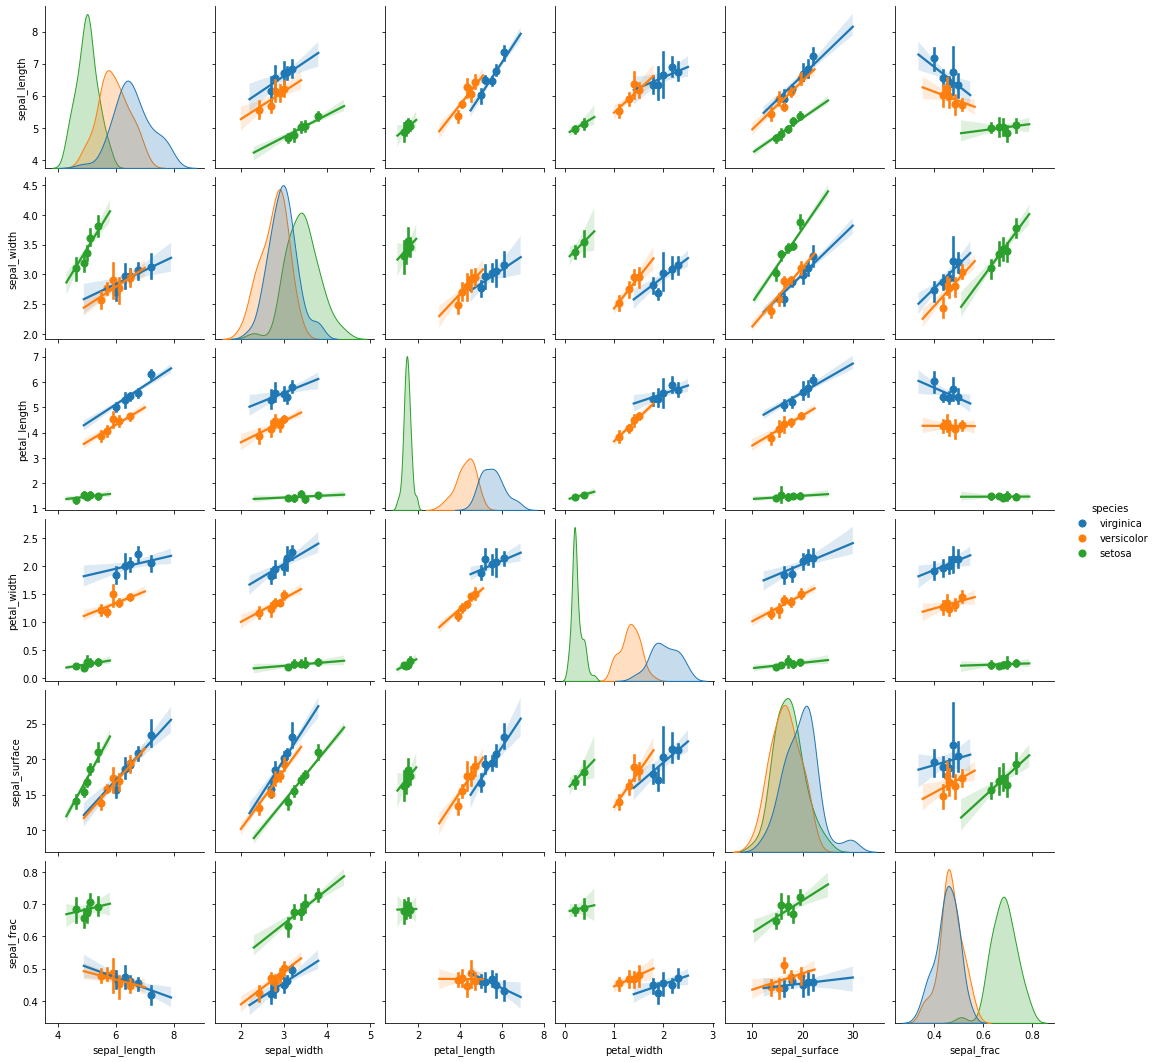

In [31]:
g = sns.pairplot(df, hue='species', kind='reg', plot_kws=dict(x_bins=5))

## scaling
In the case of the iris dataset, the values of the variables are pretty close to eachother. But what to do if the variables are very far apart? Usually, a good idea is to transform the data to z-scores. These can be calculated as:

$$z = \frac{x - \mu}{\sigma}$$

Where $\mu$ is the mean value of the dataset and $\sigma$ the standard deviation.

This is implemented as a [standardscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) in sklearn

In [26]:
from sklearn.preprocessing import StandardScaler

df = sns.load_dataset('iris')
scaler = StandardScaler()
y = df['species'].values
data = df.drop('species', axis=1)
labels = data.columns
X = scaler.fit_transform(data)

In [27]:
type(X)

numpy.ndarray

We now have an numpy array. A quick way to peek at the result would be to simply invoke matplotlib. But we might want to also color the data according to the labels. That can also be done with matplotlib, but generally the seaborn interface is more userfriendly for coloring.

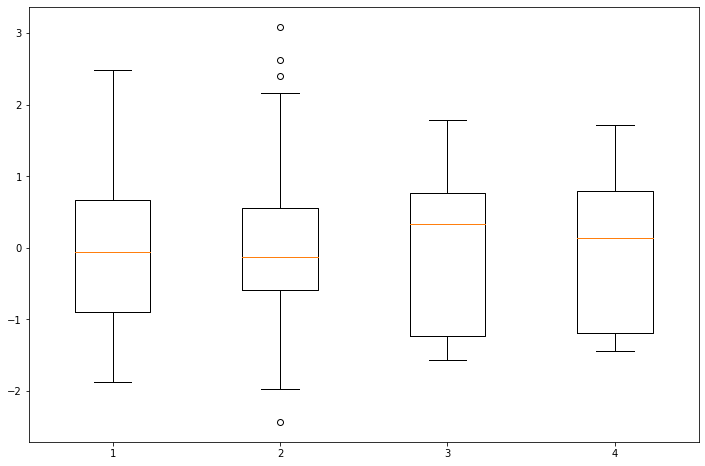

In [28]:
plt.boxplot(X);

To use seaborn, we could overwrite the dataframe we have with the scaled data, but we generally would want to avoid that. A cleaner way is to stitch it back into a dataframe, just for plotting, as to keep the original data intact.

<AxesSubplot:xlabel='variable', ylabel='value'>

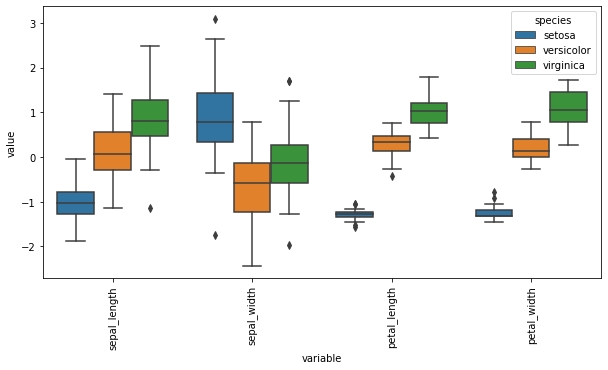

In [29]:
# stitch it back
p = pd.DataFrame(X, columns = labels)
p['species'] = y

# prepare for plotting
p = p.melt(id_vars='species')

# esthetics
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(data = p, x = 'variable', y='value', hue='species')

In the case of the iris dataset, this wont make much difference. But if the scales are widely apart, it will help a lot (both for the visualisation and for the speed of a model).

An interesting feature of a scaled plot, is that you can read standard deviations directly from the plot.